In [1]:
#Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.2. Decision Boundary Plot/Output')
cur_date = "092422"

library(readxl)
library(tidyverse)
library(tidycensus)
library(ggpubr)
library(quantreg)

# reading in files
acs_df = data.frame(read_excel("Input/ACS_Data_091422.xlsx", sheet = 2)) #R13168684_SL140.csv
wildfire_tract_df = data.frame(read_excel("Input/Wildfire_tract_053022.xls")) #WFH_tract.csv

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve




In [2]:
# viewing data
head(acs_df)
head(wildfire_tract_df)

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,⋯,SE_A13001H_002,SE_A13001H_003,SE_A13001I_001,SE_A13001I_002,SE_A13001I_003,SE_A20001_001,SE_A20001_002,SE_A20001_003,SE_A20001_004,SE_A20001_005
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,37001020100,"Census Tract 201, Alamance County, North Carolina",ACSSF,nc,140,0,3490,NA,NA,NA,⋯,0,190,2638,370,2268,4048,439,3609,1755,2443
2,37001020200,"Census Tract 202, Alamance County, North Carolina",ACSSF,nc,140,0,3491,NA,NA,NA,⋯,693,985,1213,520,693,4021,755,3266,2035,1514
3,37001020301,"Census Tract 203.01, Alamance County, North Carolina",ACSSF,nc,140,0,3492,NA,NA,NA,⋯,286,1146,1064,444,620,3526,738,2788,1632,1708
4,37001020302,"Census Tract 203.02, Alamance County, North Carolina",ACSSF,nc,140,0,3493,NA,NA,NA,⋯,395,1781,774,121,653,3731,1081,2650,1757,1377
5,37001020400,"Census Tract 204, Alamance County, North Carolina",ACSSF,nc,140,0,3494,NA,NA,NA,⋯,242,981,1280,363,917,6634,1041,5593,3243,3046
6,37001020501,"Census Tract 205.01, Alamance County, North Carolina",ACSSF,nc,140,0,3495,NA,NA,NA,⋯,47,250,3097,345,2752,4063,541,3522,1294,2696


,OBJECTID,FID_1,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,⋯,Max_Wildfire.Hazard.Potential.Max,Var_Wildfire.Hazard.Potential.Max,SD_Wildfire.Hazard.Potential.Max,Avg_Wildfire.Hazard.Potential.Mean,Min_Wildfire.Hazard.Potential.Mean,Max_Wildfire.Hazard.Potential.Mean,Var_Wildfire.Hazard.Potential.Mean,SD_Wildfire.Hazard.Potential.Mean,Shape_Length,Shape_Area
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,37,141,920300,37141920300,9203,Census Tract 9203,G5020,S,⋯,6213,4735969.0,2176.22816,330.3177,116.8410,715.5177,111720.0965,334.24556,0.9949865,0.0232804652
2,2,1,37,141,990100,37141990100,9901,Census Tract 9901,G5020,S,⋯,6213,3086876.3,1756.95086,431.8320,157.4920,715.5177,77913.6727,279.13021,0.6011031,0.0130609691
3,3,2,37,071,031600,37071031600,316,Census Tract 316,G5020,S,⋯,840,264.5,16.26346,179.7338,171.3415,188.1261,140.8618,11.86852,0.2538232,0.0022595855
4,4,3,37,071,031800,37071031800,318,Census Tract 318,G5020,S,⋯,817,NA,NA,188.1261,188.1261,188.1261,NA,NA,0.1180164,0.0006021877
5,5,4,37,155,961801,37155961801,9618.01,Census Tract 9618.01,G5020,S,⋯,1484,NA,NA,229.8897,229.8897,229.8897,NA,NA,0.5870197,0.0102205805
6,6,5,37,155,961601,37155961601,9616.01,Census Tract 9616.01,G5020,S,⋯,2872,963272.0,981.46421,265.4323,229.8897,300.9749,2526.5545,50.26484,0.5817140,0.0077659405


Combining acs, wildifre tract, and census data to see if social determinants of health are associated with wildfire hazard potential.

In [3]:
# getting col names in the wildfire tract df that we're interested in 
wildfire_tract_df = wildfire_tract_df %>%
  select(GEOID, NAME, NAMELSAD, ALAND, AWATER, Avg_Wildfire.Hazard.Potential.Min, Min_Wildfire.Hazard.Potential.Max,
  Max_Wildfire.Hazard.Potential.Min, Avg_Wildfire.Hazard.Potential.Max, Min_Wildfire.Hazard.Potential.Max,
  Max_Wildfire.Hazard.Potential.Max, Avg_Wildfire.Hazard.Potential.Mean, Min_Wildfire.Hazard.Potential.Mean,
  Max_Wildfire.Hazard.Potential.Mean, Avg_ACRES, Min_ACRES, Max_ACRES) 

# renaming to create a FIPS col so we can merge the two dataframes
acs_df = acs_df %>%
  rename(GEOID = Geo_FIPS)

# merging the Wildfire data to ACS data
wildfire_tract_acs_df <- merge(wildfire_tract_df, acs_df, by = "GEOID")
head(wildfire_tract_acs_df)

,GEOID,NAME,NAMELSAD,ALAND,AWATER,Avg_Wildfire.Hazard.Potential.Min,Min_Wildfire.Hazard.Potential.Max,Max_Wildfire.Hazard.Potential.Min,Avg_Wildfire.Hazard.Potential.Max,Max_Wildfire.Hazard.Potential.Max,⋯,SE_A13001H_002,SE_A13001H_003,SE_A13001I_001,SE_A13001I_002,SE_A13001I_003,SE_A20001_001,SE_A20001_002,SE_A20001_003,SE_A20001_004,SE_A20001_005
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,37001020100,201,Census Tract 201,4511689,0,0,365,0,365,365,⋯,0,190,2638,370,2268,4048,439,3609,1755,2443
2,37001020200,202,Census Tract 202,3464706,0,0,365,0,365,365,⋯,693,985,1213,520,693,4021,755,3266,2035,1514
3,37001020301,203.01,Census Tract 203.01,4963841,62025,0,365,0,365,365,⋯,286,1146,1064,444,620,3526,738,2788,1632,1708
4,37001020302,203.02,Census Tract 203.02,6318866,141195,0,365,0,365,365,⋯,395,1781,774,121,653,3731,1081,2650,1757,1377
5,37001020400,204,Census Tract 204,11558153,268108,0,365,0,365,365,⋯,242,981,1280,363,917,6634,1041,5593,3243,3046
6,37001020501,205.01,Census Tract 205.01,7138142,78069,0,365,0,365,365,⋯,47,250,3097,345,2752,4063,541,3522,1294,2696


In [4]:
# pulling data from the census using an API key
# request your own API key at http://api.census.gov/data/key_signup.html 
census_api_key("26887b197b0785a54a045f3be1cd67622a569fb1", install = TRUE, overwrite = TRUE) 

# necessary to access data
readRenviron("~/.Renviron")

# obtaining data and feature geometry for the ACS
NC_income <- get_acs(
  geography = "tract", 
  variables = "B19013_001",
  state = "NC", 
  year = 2020,
  geometry = TRUE
)

head(NC_income)

Your original .Renviron will be backed up and stored in your R HOME directory if needed.

Your API key has been stored in your .Renviron and can be accessed by Sys.getenv("CENSUS_API_KEY"). 
To use now, restart R or run `readRenviron("~/.Renviron")`



[1] "26887b197b0785a54a045f3be1cd67622a569fb1"

Getting data from the 2016-2020 5-year ACS




  |======================================================================| 100%


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,GEOID,NAME,variable,estimate,moe,geometry
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,37037020600,"Census Tract 206, Chatham County, North Carolina",B19013_001,51144,4786,MULTIPOLYGON (((-79.40216 3...
2,37153970200,"Census Tract 9702, Richmond County, North Carolina",B19013_001,49550,9719,MULTIPOLYGON (((-80.07567 3...
3,37001021702,"Census Tract 217.02, Alamance County, North Carolina",B19013_001,70807,11928,MULTIPOLYGON (((-79.52464 3...
4,37001020100,"Census Tract 201, Alamance County, North Carolina",B19013_001,36364,9774,MULTIPOLYGON (((-79.45802 3...
5,37063001711,"Census Tract 17.11, Durham County, North Carolina",B19013_001,42016,7874,MULTIPOLYGON (((-78.94294 3...
6,37063001002,"Census Tract 10.02, Durham County, North Carolina",B19013_001,26600,7448,MULTIPOLYGON (((-78.8807 35...


In [5]:
# creating a df that only contains feature geometry
NC_feature_geometry_df = NC_income %>%
    select(GEOID, geometry)

# merging geometry (extracted acs data) with the wildfire hazard and census data
wildfire_hazard_acs_geometry_df = merge(NC_feature_geometry_df, wildfire_tract_acs_df, by = "GEOID") %>%
    # the acs geometry data provides number of individuals, which will be converted into a percentage
    # SE_A00001_001 = total population column
    filter(SE_A00001_001 > 0) %>%
    # only keeping the census tract data
    select(-contains("Geo_"))

head(wildfire_hazard_acs_geometry_df)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

GEOID       NAME   NAMELSAD            ALAND    AWATER
1 37001020100 201    Census Tract 201     4511689      0
2 37001020200 202    Census Tract 202     3464706      0
3 37001020301 203.01 Census Tract 203.01  4963841  62025
4 37001020302 203.02 Census Tract 203.02  6318866 141195
5 37001020400 204    Census Tract 204    11558153 268108
6 37001020501 205.01 Census Tract 205.01  7138142  78069
  Avg_Wildfire.Hazard.Potential.Min Min_Wildfire.Hazard.Potential.Max
1 0                                 365                              
2 0                                 365                              
3 0                                 365                              
4 0                                 365                              
5 0                                 365                              
6 0                                 365                              
  Max_Wildfire.Hazard.Potential.Min Avg_Wildfire.Hazard.Potential.Max
1 0                                 365                              
2 0                                 365                              
3 0                                 365                              
4 0                                 365                              
5 0                                 365                              
6 0                                 365                              
  Max_Wildfire.Hazard.Potential.Max geometry                       ⋯
1 365                               MULTIPOLYGON (((-79.45802 3... ⋯
2 365                               MULTIPOLYGON (((-79.43321 3... ⋯
3 365                               MULTIPOLYGON (((-79.41992 3... ⋯
4 365                               MULTIPOLYGON (((-79.40876 3... ⋯
5 365                               MULTIPOLYGON (((-79.46613 3... ⋯
6 365                               MULTIPOLYGON (((-79.49342 3... ⋯
  SE_A13001H_003 SE_A13001I_001 SE_A13001I_002 SE_A13001I_003 SE_A20001_001
1  190           2638           370            2268           4048         
2  985           1213           520             693           4021         
3 1146           1064           444             620           3526         
4 1781            774           121             653           3731         
5  981           1280           363             917           6634         
6  250           3097           345            2752           4063         
  SE_A20001_002 SE_A20001_003 SE_A20001_004 SE_A20001_005
1  439          3609          1755          2443         
2  755          3266          2035          1514         
3  738          2788          1632          1708         
4 1081          2650          1757          1377         
5 1041          5593          3243          3046         
6  541          3522          1294          2696         
  geometry                      
1 MULTIPOLYGON (((-79.45802 3...
2 MULTIPOLYGON (((-79.43321 3...
3 MULTIPOLYGON (((-79.41992 3...
4 MULTIPOLYGON (((-79.40876 3...
5 MULTIPOLYGON (((-79.46613 3...
6 MULTIPOLYGON (((-79.49342 3...

In [6]:
# before the some of the percentages can be calculated we need to obtain the total non-white and poverty populations
wildfire_hazard_acs_geometry_df$NonWhite <- (wildfire_hazard_acs_geometry_df$SE_A00001_001 - wildfire_hazard_acs_geometry_df$SE_B04001_003)
wildfire_hazard_acs_geometry_df$Poverty <- (wildfire_hazard_acs_geometry_df$SE_A13003A_002 + wildfire_hazard_acs_geometry_df$SE_A13003B_002 + wildfire_hazard_acs_geometry_df$SE_A13003C_002)

In [7]:
# it would be nice to make these lines more efficient , but that's not possible since the total population to calculqte each percentage are different for each column
# total population %  (further stratified by race, age)
wildfire_hazard_acs_geometry_df$Per_Black <- (wildfire_hazard_acs_geometry_df$SE_B04001_003 / wildfire_hazard_acs_geometry_df$SE_A00001_001) * 100
wildfire_hazard_acs_geometry_df$Per_NonWhite <- (wildfire_hazard_acs_geometry_df$NonWhite / wildfire_hazard_acs_geometry_df$SE_A00001_001) * 100
wildfire_hazard_acs_geometry_df$Per_White <- (wildfire_hazard_acs_geometry_df$SE_B04001_003 / wildfire_hazard_acs_geometry_df$SE_A00001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Native <- (wildfire_hazard_acs_geometry_df$SE_B04001_005 / wildfire_hazard_acs_geometry_df$SE_A00001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Asian <- (wildfire_hazard_acs_geometry_df$SE_B04001_006 / wildfire_hazard_acs_geometry_df$SE_A00001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Less5 <- (wildfire_hazard_acs_geometry_df$SE_A01001_002 / wildfire_hazard_acs_geometry_df$SE_A00001_001) * 100


# Poverty % (further stratified by race and age)
wildfire_hazard_acs_geometry_df$Per_Poverty <- (wildfire_hazard_acs_geometry_df$Poverty / wildfire_hazard_acs_geometry_df$SE_A00001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Poverty_NHWhite <- (wildfire_hazard_acs_geometry_df$SE_A13001I_002 / wildfire_hazard_acs_geometry_df$SE_A13001I_001) * 100
wildfire_hazard_acs_geometry_df$Per_Poverty_Black <- (wildfire_hazard_acs_geometry_df$SE_A13001B_002 / wildfire_hazard_acs_geometry_df$SE_A13001B_001) * 100
# some of the native american and asian rows have zeros, due to having a population of zero (0  denominator = undefined or NaN values)
wildfire_hazard_acs_geometry_df$Per_Poverty_Native <- (wildfire_hazard_acs_geometry_df$SE_A13001C_002 / wildfire_hazard_acs_geometry_df$SE_A13001C_001) * 100
wildfire_hazard_acs_geometry_df$Per_Poverty_Asian <- (wildfire_hazard_acs_geometry_df$SE_A13001D_002 / wildfire_hazard_acs_geometry_df$SE_A13001D_001) * 100
wildfire_hazard_acs_geometry_df$Per_Poverty_Hisp <- (wildfire_hazard_acs_geometry_df$SE_A13001H_002 / wildfire_hazard_acs_geometry_df$SE_A13001H_001) * 100
wildfire_hazard_acs_geometry_df$Per_Poverty_White <- (wildfire_hazard_acs_geometry_df$SE_A13001A_002 / wildfire_hazard_acs_geometry_df$SE_A13001A_001) * 100

wildfire_hazard_acs_geometry_df$Per_Poverty_Children <- (wildfire_hazard_acs_geometry_df$SE_A13003A_002 / (wildfire_hazard_acs_geometry_df$SE_A01001_002 + wildfire_hazard_acs_geometry_df$SE_A01001_003 + wildfire_hazard_acs_geometry_df$SE_A01001_004 + wildfire_hazard_acs_geometry_df$SE_A01001_005)) * 100
wildfire_hazard_acs_geometry_df$Per_Poverty_Adults <- (wildfire_hazard_acs_geometry_df$SE_A13001A_002 / (wildfire_hazard_acs_geometry_df$SE_A01001_006 + wildfire_hazard_acs_geometry_df$SE_A01001_007 + wildfire_hazard_acs_geometry_df$SE_A01001_008 + wildfire_hazard_acs_geometry_df$SE_A01001_009 + wildfire_hazard_acs_geometry_df$SE_A01001_010)) * 100
wildfire_hazard_acs_geometry_df$Per_Poverty_Seniors <- (wildfire_hazard_acs_geometry_df$SE_A13003C_002 / (wildfire_hazard_acs_geometry_df$SE_A01001_011 + wildfire_hazard_acs_geometry_df$SE_A01001_012 + wildfire_hazard_acs_geometry_df$SE_A01001_013)) * 100


# education level % 
wildfire_hazard_acs_geometry_df$Per_LHS_Edu <- (wildfire_hazard_acs_geometry_df$SE_A12001_002 / wildfire_hazard_acs_geometry_df$SE_A12001_001) * 100
wildfire_hazard_acs_geometry_df$Per_HS_Edu <- (wildfire_hazard_acs_geometry_df$SE_A12001_003 / wildfire_hazard_acs_geometry_df$SE_A12001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Some_College_Edu <- (wildfire_hazard_acs_geometry_df$SE_A12001_004 / wildfire_hazard_acs_geometry_df$SE_A12001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Bacehlors_Edu <- (wildfire_hazard_acs_geometry_df$SE_A12001_005 / wildfire_hazard_acs_geometry_df$SE_A12001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Masters_Edu <- (wildfire_hazard_acs_geometry_df$SE_A12001_006 / wildfire_hazard_acs_geometry_df$SE_A12001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Professional_Edu <- (wildfire_hazard_acs_geometry_df$SE_A12001_007 / wildfire_hazard_acs_geometry_df$SE_A12001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Doctorate_Edu <- (wildfire_hazard_acs_geometry_df$SE_A12001_008 / wildfire_hazard_acs_geometry_df$SE_A12001_001) * 100
wildfire_hazard_acs_geometry_df$Per_At_Least_College_Edu <- (wildfire_hazard_acs_geometry_df$SE_B12001_004 / wildfire_hazard_acs_geometry_df$SE_A12001_001) * 100


# insurance status % (further stratified by race)
wildfire_hazard_acs_geometry_df$Per_No_Ins <- (wildfire_hazard_acs_geometry_df$SE_A20001_002 / wildfire_hazard_acs_geometry_df$SE_A20001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Ins <- (wildfire_hazard_acs_geometry_df$SE_A20001_003 / wildfire_hazard_acs_geometry_df$SE_A20001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Public_Ins <- (wildfire_hazard_acs_geometry_df$SE_A20001_004 / wildfire_hazard_acs_geometry_df$SE_A20001_001) * 100
wildfire_hazard_acs_geometry_df$Per_Private_Ins <- (wildfire_hazard_acs_geometry_df$SE_A20001_005 / wildfire_hazard_acs_geometry_df$SE_A20001_001) * 100

In [8]:
# EXPORT THE FILE HERE

Determining if each socioeconomic status (SES) variable is associated with avg wildfire hazard potential mean using linear and quantile linear regression

In [9]:
# getting the poverty col names to iterate through them using a loop in the function below
poverty_variables = colnames(wildfire_hazard_acs_geometry_df)[112:121]

# creating the linear regression function 
linear_regression = function (df, SES_variables){
  # """
  # Creating a function to perform linear regression.
  # :param (input): df (containing data to be analyzed), socioeconomic status (SES variables)
  # :output: df containing the model/method, SES variable, statistic, p value, and p adjust
  # """
  
  # creating an empty df to store the t and p values from the linear regression
  values_df = data.frame()
  for (i in 1:length(SES_variables)){
    # generalized linear model (GLM)
    linear_model = glm(as.formula(paste0("Avg_Wildfire.Hazard.Potential.Mean", "~", SES_variables[i])), data = df, family = gaussian)
    summarized_linear_model = summary(linear_model)
    
    # creating a row of data that specifies the method, variable, statistic, and p value
    linear_values = c("Linear Regression", SES_variables[i], summarized_linear_model$coefficients[c(6,8)])
    
    # adding just the name statistic and p value to the df
    values_df = rbind(values_df, linear_values)
    
  }  
  
  # adding colnames
  colnames(values_df) = c("Method", "Variable", "Statistic", "P Value")
  
  # adjusting p value
  values_df$`P Adj` = p.adjust(as.numeric(as.character(values_df$`P Value`)), method = "fdr")
  
  return(values_df)
}

In [10]:
# calling function
lm_results = linear_regression(wildfire_hazard_acs_geometry_df, poverty_variables)
head(lm_results)

,Method,Variable,Statistic,P Value,P Adj
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Linear Regression,Per_Poverty,1.43703846308728,0.150825297251181,0.3770632
2,Linear Regression,Per_Poverty_NHWhite,0.167609855770668,0.86690306453312,0.8669031
3,Linear Regression,Per_Poverty_Black,0.671006326192784,0.502278413076752,0.7882330
4,Linear Regression,Per_Poverty_Native,0.406869894033074,0.684179194962114,0.7882330
5,Linear Regression,Per_Poverty_Asian,-0.372708686344048,0.709409743967908,0.7882330
6,Linear Regression,Per_Poverty_Hisp,-0.456760786768936,0.647882423465659,0.7882330


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 143 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 143 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1495 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1495 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 870 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 870 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 130 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 130 rows containing missing values (ge

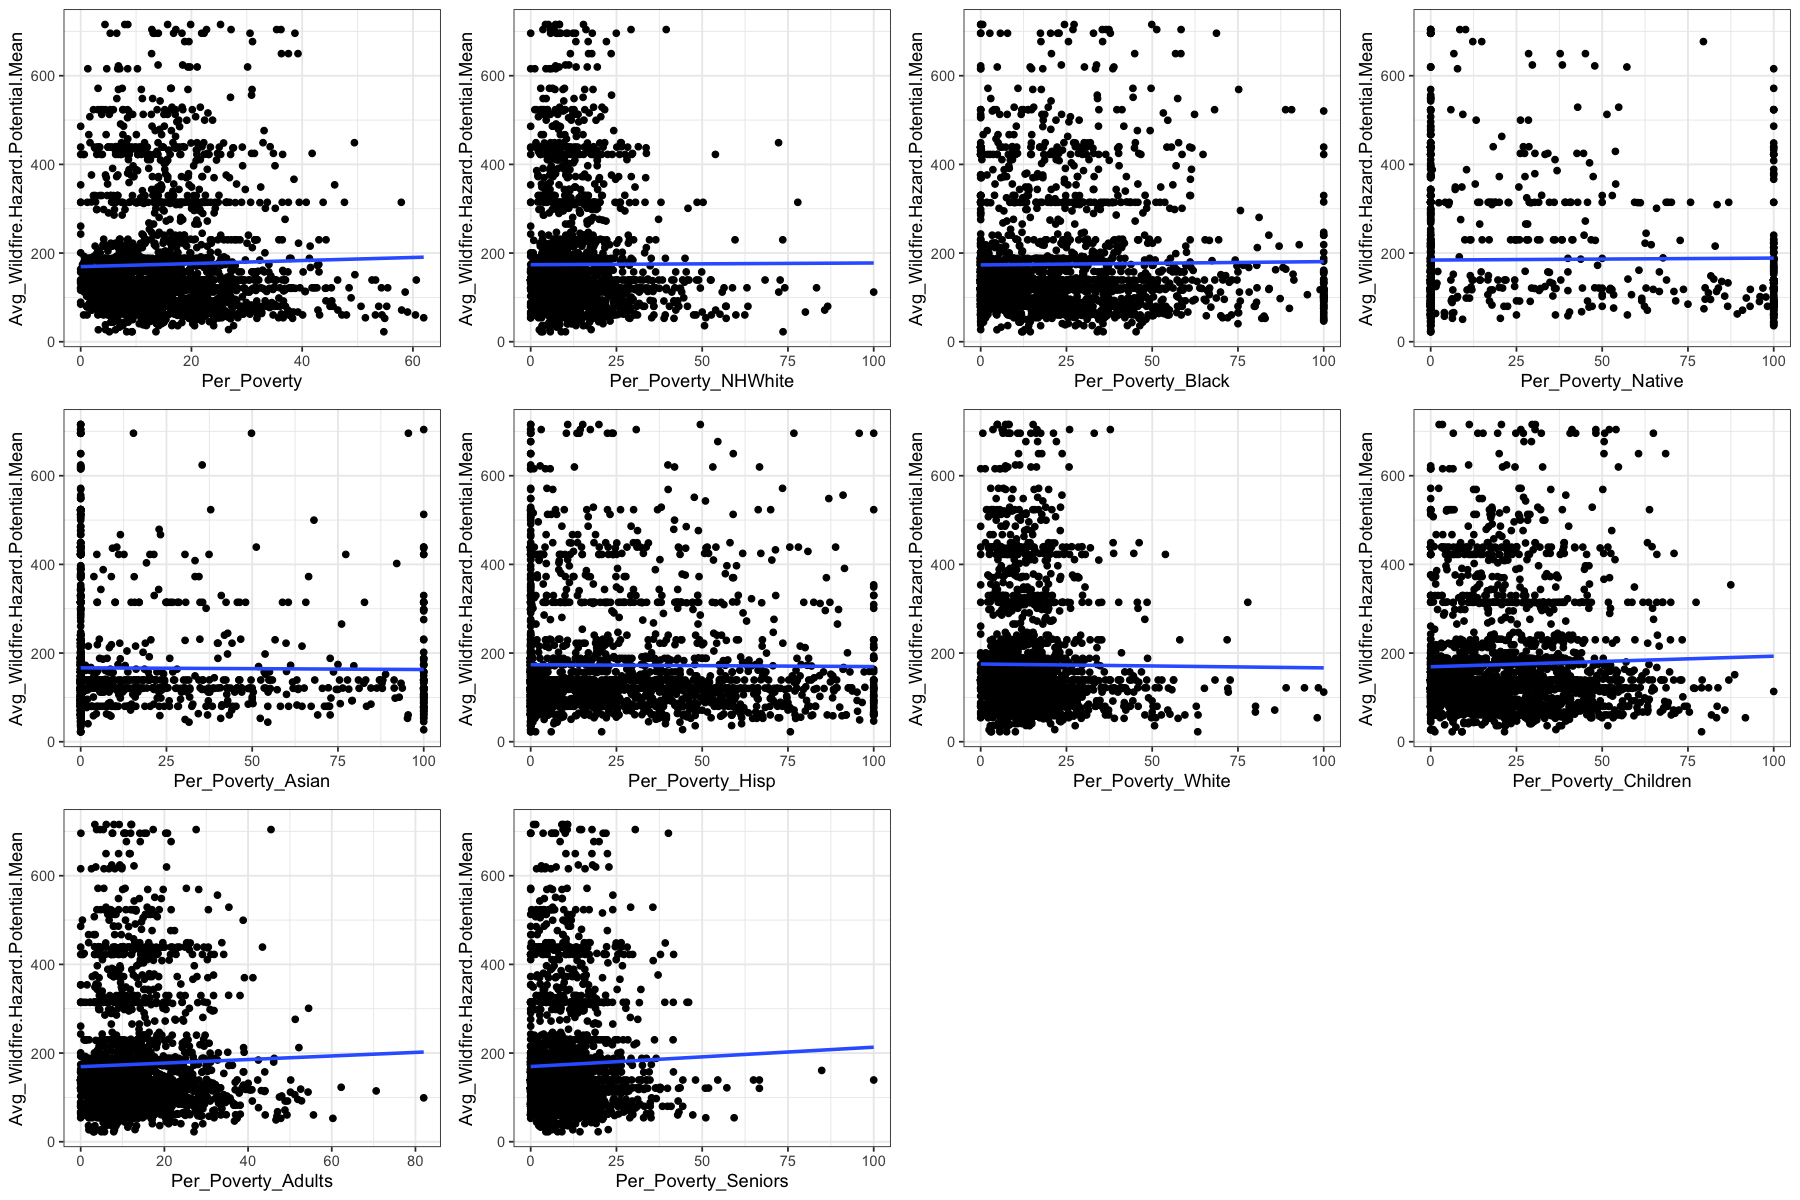

In [11]:
# creating linear plots
options(repr.plot.width=15, repr.plot.height=10) #changing plot size

plots = list()
for (i in 1:length(poverty_variables)){
  plots[[i]] = ggplot(data = wildfire_hazard_acs_geometry_df, mapping = aes_string(x = poverty_variables[i], y = "Avg_Wildfire.Hazard.Potential.Mean")) + 
    geom_point() + 
    geom_smooth(method = "lm", se = FALSE) + 
    theme_bw()
}

# viewing all plots
ggarrange(plotlist = plots)

In [15]:
# now trying quantile regression
# wildfire hazard potential (WHP) already seems to be grouping in strata, so quantile regression performs linear 
# regression within each quantile

# creating the quantile regression function 
quantile_regression = function (df, SES_variables){
  # """
  # Creating a function to perform linear quantile regression.
  # :param (input): df (containing data to be analyzed), socioeconomic status (SES variables)
  # :output: df containing the model/method, SES variable, quantile, statistic, p value, and p adjust
  # """
  
  # creating a vector to loop through for the argument tau that specifies the quantile
  tau_values = c(0.2, 0.4, 0.6, 0.8) #seq(0, 1, by = 0.2)
  
  # creating an empty df to store the t and p values from the quantile regression
  values_df = data.frame()
  
  for (i in 1:length(SES_variables)){
    for (j in 1:length(tau_values)){
      # quantile linear regression
      quantile_model = rq(as.formula(paste0("Avg_Wildfire.Hazard.Potential.Mean", "~", SES_variables[i])), 
                          data = df, tau = tau_values[j])
      summarized_quantile_model = summary(quantile_model)
      
      # creating a row of data that specifies the method, variable, tau, statistic, and p value
      quantile_values = c("Quantile Regression", SES_variables[i], tau_values[j], 
                          summarized_quantile_model$coefficients[c(6,8)])
      
      # adding just the name statistic and p value to the df
      values_df = rbind(values_df, quantile_values)
      
      }  
    }
  
  # adding colnames
  colnames(values_df) = c("Method", "Variable", "Quantile", "Statistic", "P Value")
  
  # adjusting p value within each quantile
  values_df = values_df %>%
    group_by(Quantile) %>%
    mutate(`P Adjust` = p.adjust(as.numeric(as.character(`P Value`)), method = "fdr")) %>%
    ungroup()
  
  return(values_df)
}

In [16]:
# calling function
quantile_results = quantile_regression(wildfire_hazard_acs_geometry_df, poverty_variables)
head(quantile_results)

Warning message in summary.rq(quantile_model):
“4 non-positive fis”
Warning message in summary.rq(quantile_model):
“3 non-positive fis”
Warning message in summary.rq(quantile_model):
“31 non-positive fis”
Warning message in summary.rq(quantile_model):
“91 non-positive fis”
Warning message in summary.rq(quantile_model):
“5 non-positive fis”


Method,Variable,Quantile,Statistic,P Value,P Adjust
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Quantile Regression,Per_Poverty,0.2,-10.2532970727577,0,0.0000000000
Quantile Regression,Per_Poverty,0.4,-0.577906396175726,0.563376491972601,0.8437726296
Quantile Regression,Per_Poverty,0.6,8.34274845197971e-15,0.999999999999993,1.0000000000
Quantile Regression,Per_Poverty,0.8,3.94957994927382,8.03328299485706e-05,0.0004016641
Quantile Regression,Per_Poverty_NHWhite,0.2,-12.0938797182803,0,0.0000000000
Quantile Regression,Per_Poverty_NHWhite,0.4,-0.565421147871175,0.571835427968624,0.8437726296


Warning message:
“Ignoring unknown parameters: quantile”
Warning message:
“Ignoring unknown parameters: quantile”
Warning message:
“Ignoring unknown parameters: quantile”
Warning message:
“Ignoring unknown parameters: quantile”
Warning message:
“Ignoring unknown parameters: quantile”
Warning message:
“Ignoring unknown parameters: quantile”
Warning message:
“Ignoring unknown parameters: quantile”
Warning message:
“Ignoring unknown parameters: quantile”
Warning message:
“Ignoring unknown parameters: quantile”
Warning message:
“Ignoring unknown parameters: quantile”
Smoothing formula not specified. Using: y ~ x

Warning message:
“Removed 8 rows containing non-finite values (stat_quantile).”
Smoothing formula not specified. Using: y ~ x

Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 143 rows containing non-finite values (stat_quantile).”
Smoothing formula not specified. Using: y ~ x

Warning message:
“Removed 143 rows containing missing

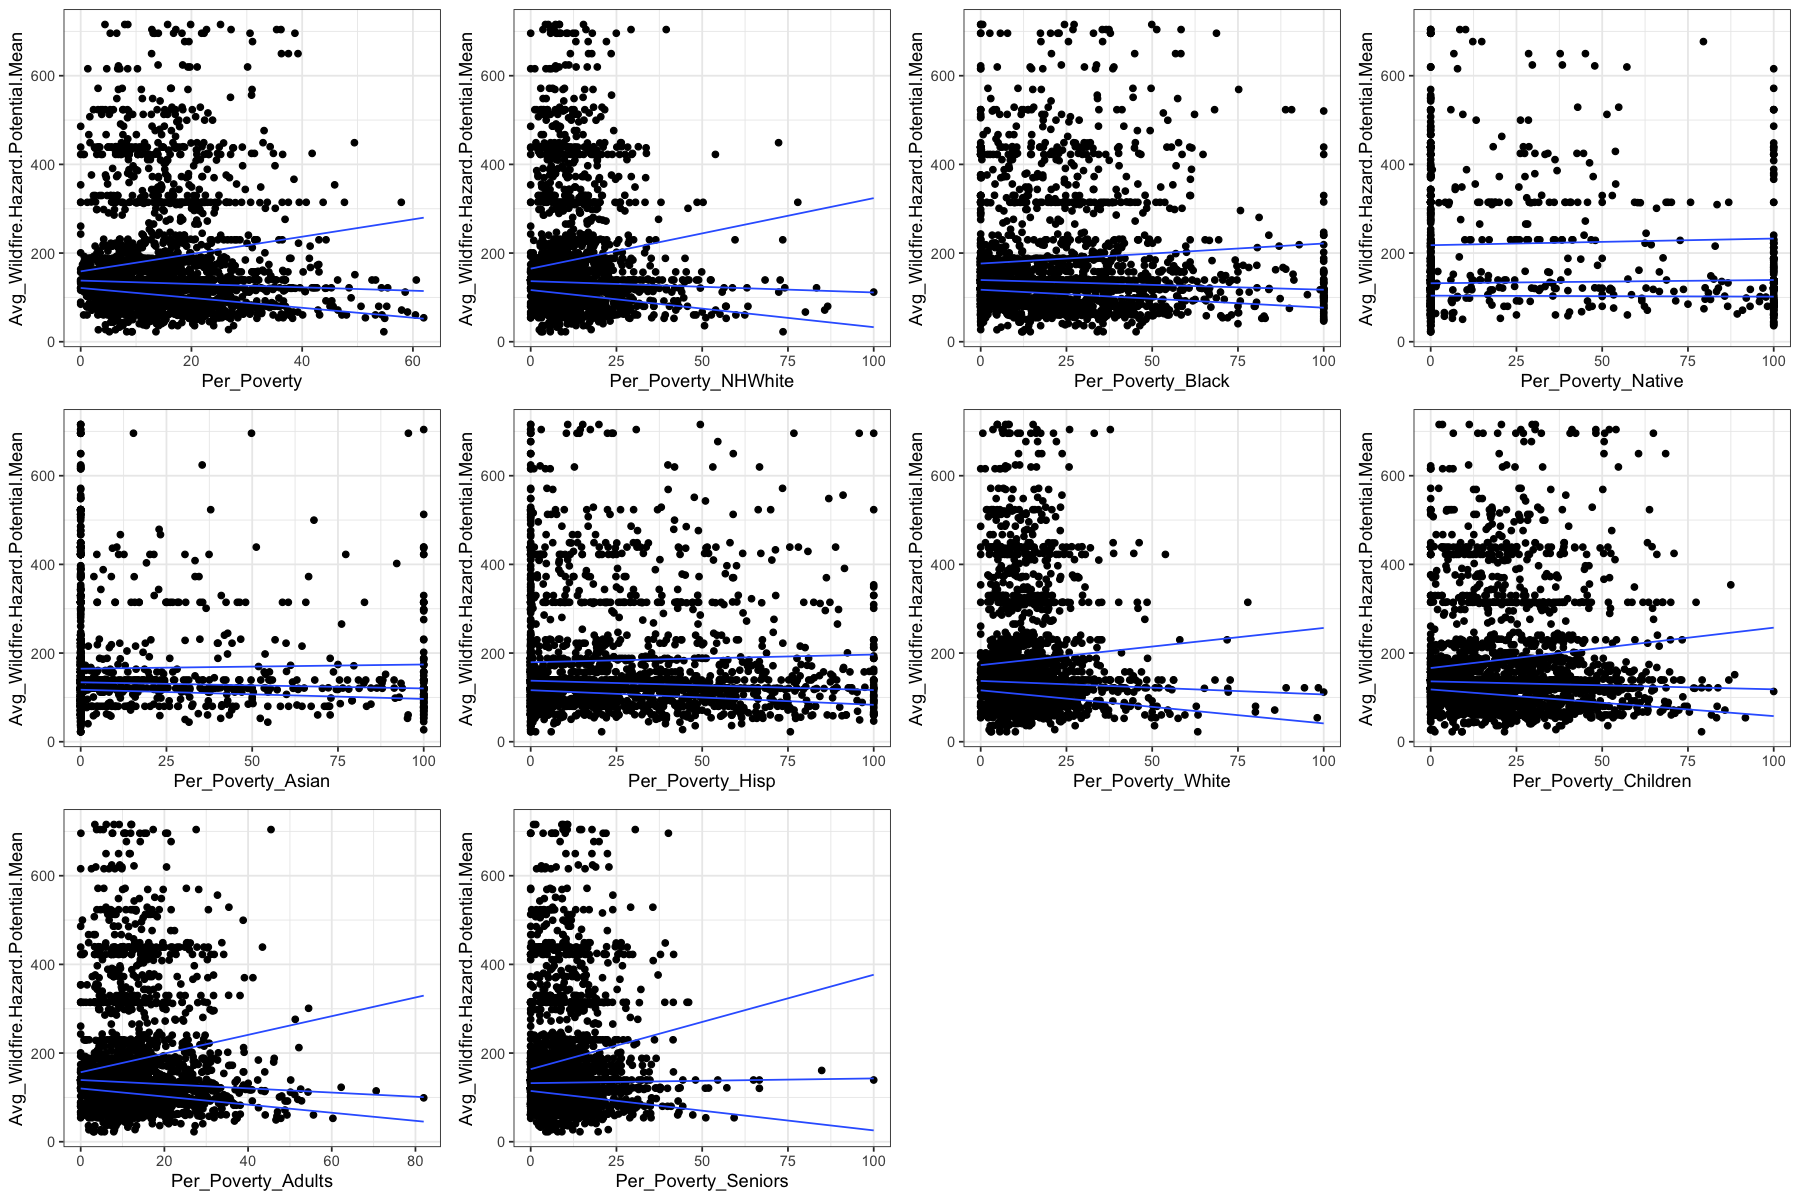

In [14]:
# creating quantile plots
plots = list()
for (i in 1:length(poverty_variables)){
  plots[[i]] = ggplot(data = wildfire_hazard_acs_geometry_df, mapping = aes_string(x = poverty_variables[i], y = "Avg_Wildfire.Hazard.Potential.Mean")) + 
    geom_point() + 
    geom_quantile(quantile = c(0.2, 0.4, 0.6, 0.8), method = "rq") + 
    theme_bw()
}

# viewing all plots
ggarrange(plotlist = plots)